# 🔍 EDA Workflow

# 1. Understand the Dataset Structure

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\4mjab\Desktop\DATA ANALYTICS\EDA -Car_sales\archive\car_sales_data.csv")
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


# 2. Clean the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [4]:
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [5]:
df.isnull().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

# 3.📊 Univariate Analysis

# 🔹 Price

<Axes: ylabel='Frequency'>

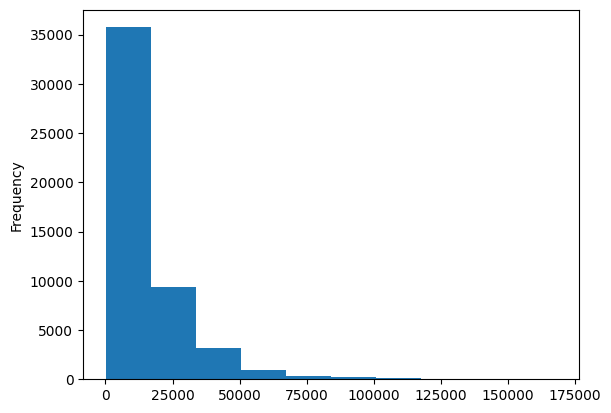

In [6]:
df['Price'].plot(kind='hist')

In [7]:
df['Price'].skew()

np.float64(2.850159195298556)

<Axes: >

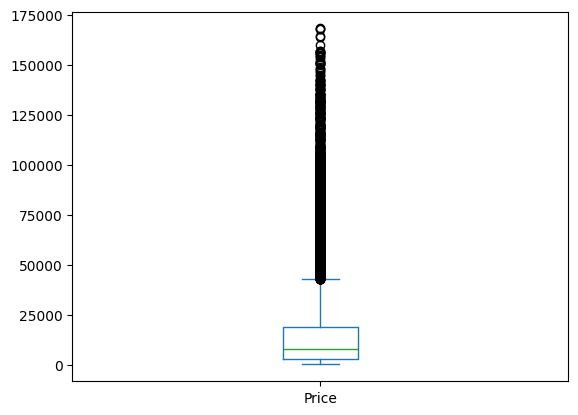

In [8]:
df['Price'].plot(kind='box')

In [9]:
df['Price_log'] = np.log1p(df['Price'])

The distribution of car prices is highly right-skewed, with a skewness value of approximately 2.85. This indicates that:
- Most vehicles in the dataset are priced on the lower end.
- A small number of high-priced cars (likely luxury or newer models) create a long tail on the right.
- Summary statistics like the mean may be inflated due to these outliers.

  Action Taken: To normalize the distribution and improve interpretability, a log transformation was applied:This helps
  stabilize variance and makes patterns more visible in visualizations and modeling.

# 🔹 Mileage

<Axes: ylabel='Density'>

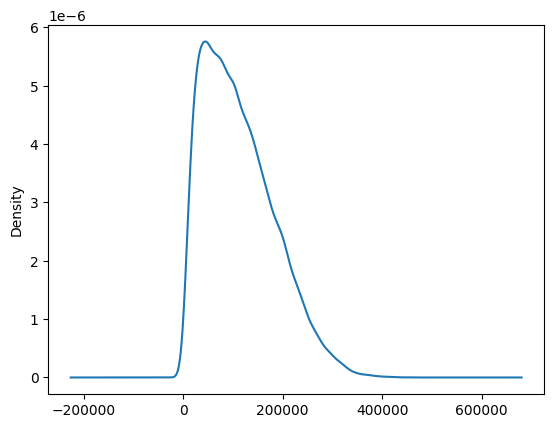

In [10]:
df['Mileage'].plot(kind='kde')

In [11]:
df['Mileage'].skew()

np.float64(0.7251407437632911)

<Axes: >

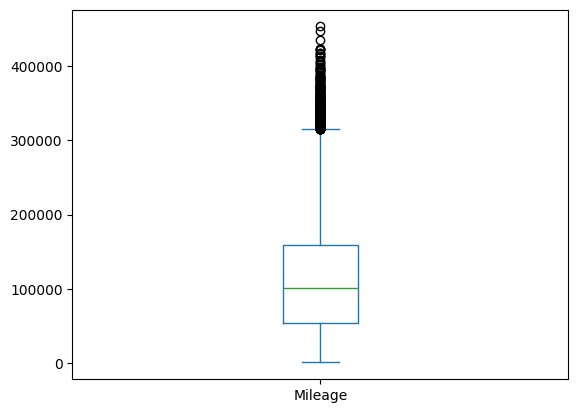

In [12]:
df['Mileage'].plot(kind='box')

Mileage shows a moderate right skew, with a skewness value of approximately 0.73. This suggests:
- Most cars have relatively low mileage, possibly indicating newer or lightly used vehicles.
- There’s a noticeable tail of high-mileage cars, but not extreme enough to distort the distribution severely.
- The data is usable without transformation, though mileage may still benefit from segmentation 
  (e.g., by car age or fuel type).


In [13]:
df['Fuel type'].value_counts()

Fuel type
Petrol    25488
Diesel    13268
Hybrid    11244
Name: count, dtype: int64

<Axes: xlabel='Fuel type'>

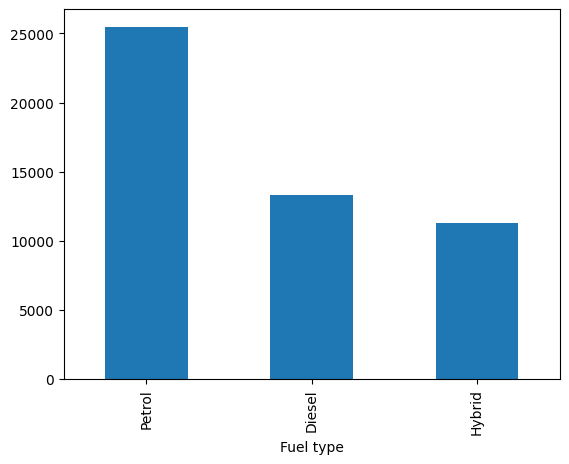

In [14]:
df['Fuel type'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

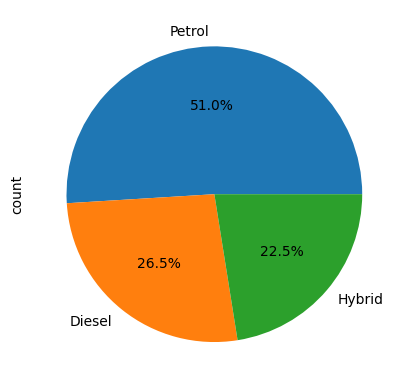

In [15]:
df['Fuel type'].value_counts().plot(kind='pie',autopct='%0.1f%%')

“Petrol vehicles account for nearly half of the dataset, reflecting their continued dominance in the market. Diesel cars,
while less prevalent, still form a substantial quarter—possibly favored for long-distance driving. Hybrid vehicles, though 
fewer, represent a growing eco-conscious segment. This distribution sets the stage for deeper analysis into how fuel type
influences pricing, mileage, and depreciation.”

# 4. Bivariate Analysis

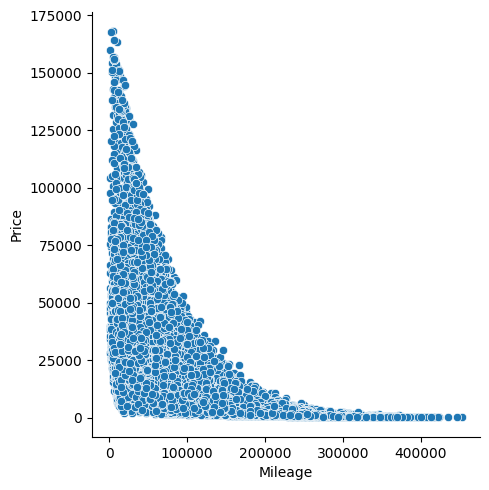

In [16]:
sns.relplot(data=df, x='Mileage',y='Price',kind='scatter' )

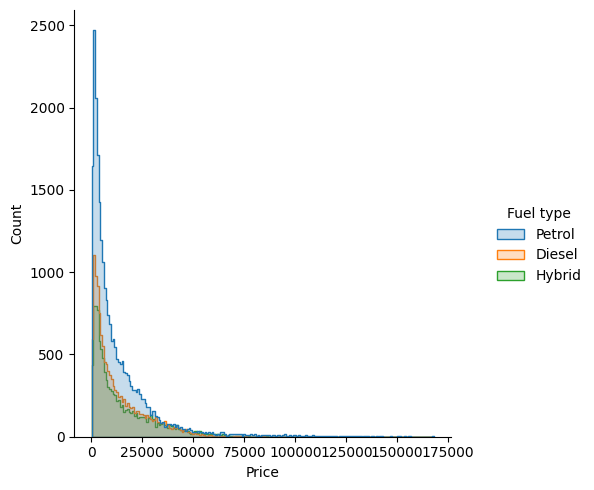

In [17]:
sns.displot(data=df,x='Price',kind='hist',element='step',hue='Fuel type')

# 📊 1. Average Price by Fuel Type


In [18]:
df.groupby('Fuel type')['Price'].mean().sort_values(ascending=False)


Fuel type
Hybrid    14949.288154
Petrol    13690.617742
Diesel    13145.078158
Name: Price, dtype: float64

Text(0, 0.5, 'Mean Price')

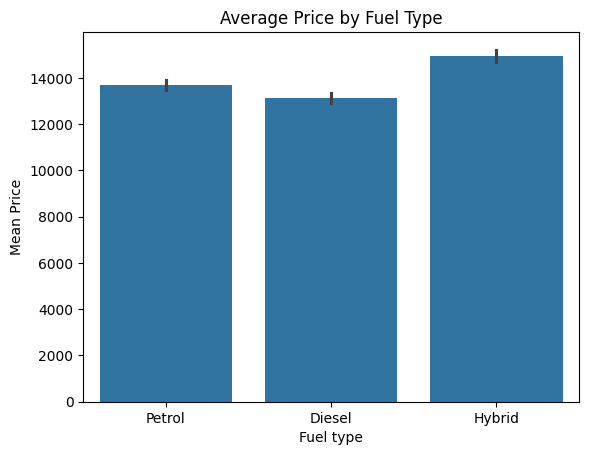

In [20]:
sns.barplot(x='Fuel type', y='Price', data=df, estimator=np.mean)
plt.title('Average Price by Fuel Type')
plt.ylabel('Mean Price')


“Hybrid vehicles have the highest average price, reflecting their newer technology and eco-friendly appeal. Petrol cars,
while most common, tend to be more budget-friendly. Diesel vehicles fall in between,
possibly due to their long-distance efficiency but declining popularity.”

# 📊 2. Average Mileage by Fuel Type

In [21]:
df.groupby('Fuel type')['Mileage'].mean().sort_values()

Fuel type
Hybrid    111622.108502
Diesel    112667.486584
Petrol    112794.838159
Name: Mileage, dtype: float64

Text(0, 0.5, 'Mean Mileage')

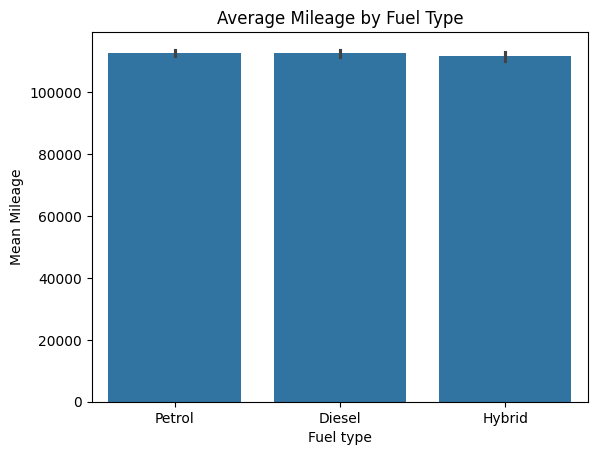

In [22]:
sns.barplot(x='Fuel type', y='Mileage', data=df, estimator=np.mean)
plt.title('Average Mileage by Fuel Type')
plt.ylabel('Mean Mileage')

“Diesel cars show the highest average mileage, consistent with their use in long-haul driving. Petrol vehicles have
moderate mileage, while hybrids—often
newer—tend to have lower mileage, reinforcing their premium positioning.”

# 📈 3. Price vs. Mileage by Fuel Type

Text(0.5, 1.0, 'Price vs. Mileage by Fuel Type')

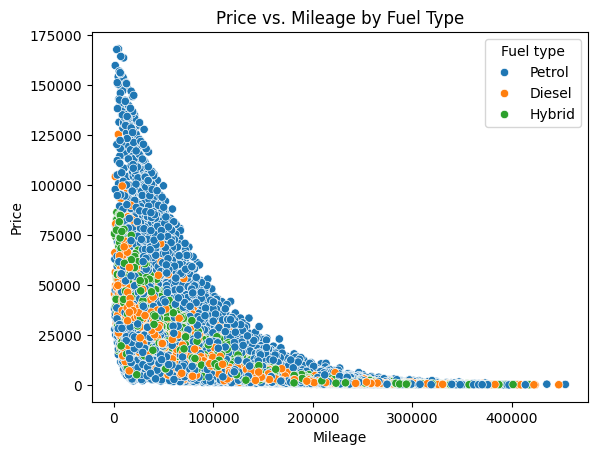

In [24]:
sns.scatterplot(x='Mileage', y='Price', hue='Fuel type', data=df)
plt.title('Price vs. Mileage by Fuel Type')

“Across all fuel types, price generally decreases as mileage increases—indicating depreciation. 
However, hybrid vehicles maintain higher prices even at 
moderate mileage, suggesting stronger resale value or newer inventory.”

# 5. Feature Engineering


- Car age

In [30]:
df['Car_Age'] = 2025 - df['Year of manufacture'] 

- Price per km

In [32]:
df['price_per_km'] = df['Price'] / df['Mileage']

🔹 3. Is_Hybrid / Is_Diesel / Is_Petrol

In [33]:
df['Is_Hybrid'] = (df['Fuel type'] == 'Hybrid').astype(int)


🔹 4. High_Mileage Flag

In [34]:
df['High_Mileage'] = (df['Mileage'] > df['Mileage'].median()).astype(int)

🔹 5. Log-Transformed Price

In [35]:
df['Log_Price'] = np.log1p(df['Price'])

🔹 6. Brand Extraction 

In [37]:
df['Brand'] = df['Model'].str.split().str[0]

# 🔄 Encoding Categorical Variables

In [38]:
df.select_dtypes(include='object').columns


Index(['Manufacturer', 'Model', 'Fuel type', 'Brand'], dtype='object')

In [40]:
df_encoded = pd.get_dummies(df, columns=['Fuel type', 'Brand'], drop_first=True)


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Model_encoded'] = le.fit_transform(df['Model'])


In [49]:
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price,Price_log,Car_Age,price_per_km,Is_Hybrid,High_Mileage,Log_Price,Brand,Transmission_encoded,Model_encoded
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074,8.031060,23,0.024148,0,1,8.031060,Fiesta,3,3
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704,10.813861,9,0.859188,0,0,10.813861,718,0,0
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072,10.088846,11,0.614238,0,0,10.088846,Mondeo,7,7
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705,7.441907,37,0.008088,1,1,7.441907,RAV4,11,11
4,VW,Polo,1.0,Petrol,2006,127869,4101,8.319230,19,0.032072,0,1,8.319230,Polo,9,9


In [50]:
df.corr(numeric_only=True)['Price'].sort_values(ascending=False)


Price                   1.000000
Price_log               0.802215
Log_Price               0.802215
Year of manufacture     0.714209
price_per_km            0.578364
Engine size             0.398371
Is_Hybrid               0.036760
Model_encoded          -0.034318
Transmission_encoded   -0.034318
High_Mileage           -0.577634
Mileage                -0.632692
Car_Age                -0.714209
Name: Price, dtype: float64

# 🔍 Step 6: Outlier Detection

📦 1. Boxplots for Visual Detection


Text(0.5, 1.0, 'Boxplot of Car Prices')

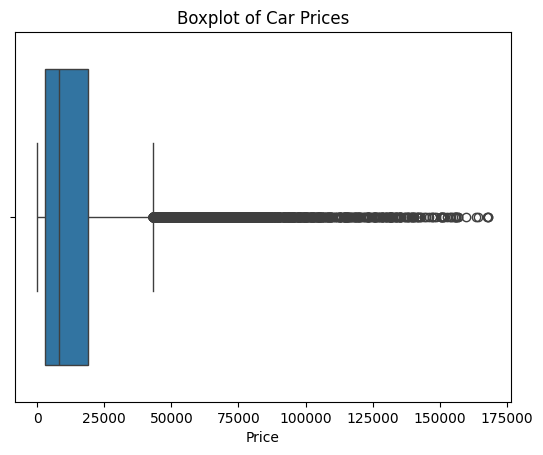

In [51]:
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Car Prices')


Text(0.5, 1.0, 'Boxplot of Mileage')

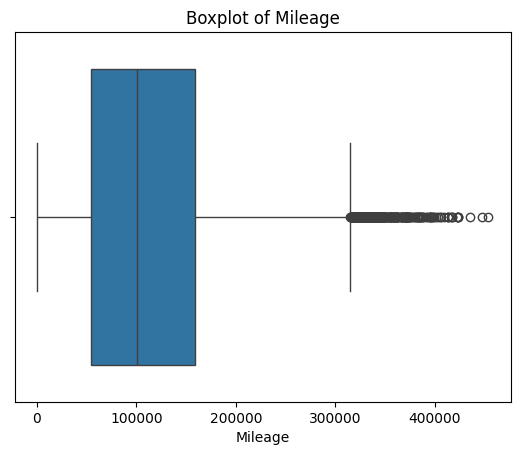

In [54]:
sns.boxplot(x=df['Mileage'])
plt.title('Boxplot of Mileage')

Text(0.5, 1.0, 'Boxplot of Engine size')

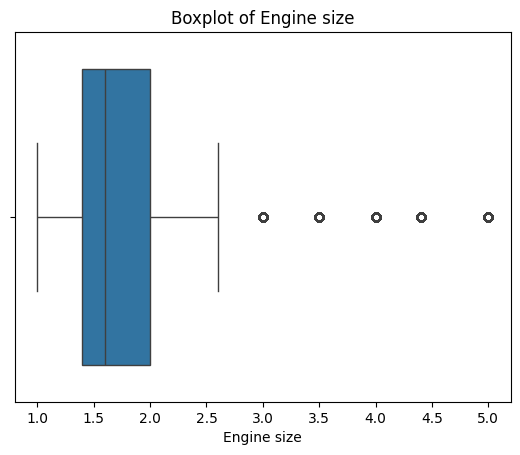

In [55]:
sns.boxplot(x=df['Engine size'])
plt.title('Boxplot of Engine size')

📐 2. Z-Score Method

In [53]:
from scipy.stats import zscore
df['Price_z'] = zscore(df['Price'])
outliers_price = df[df['Price_z'].abs() > 3]


In [57]:
outliers_price.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price,Price_log,Car_Age,price_per_km,Is_Hybrid,High_Mileage,Log_Price,Brand,Transmission_encoded,Model_encoded,Price_z
41,BMW,M5,4.0,Petrol,2017,22759,97758,11.490261,8,4.295356,0,0,11.490261,M5,6,6,5.112479
81,Porsche,718 Cayman,2.4,Petrol,2021,14070,69526,11.149470,4,4.941436,0,0,11.149470,718,0,0,3.392747
109,Toyota,RAV4,2.4,Petrol,2021,6829,66031,11.097895,4,9.669205,0,0,11.097895,RAV4,11,11,3.179852
153,Porsche,718 Cayman,4.0,Petrol,2018,20634,70913,11.169223,7,3.436706,0,0,11.169223,718,0,0,3.477236
167,Toyota,RAV4,1.8,Hybrid,2021,8120,68163,11.129672,4,8.394458,1,0,11.129672,RAV4,11,11,3.309721


🔧 3. Handling Outliers

In [58]:
df = df[df['Price_z'].abs() <= 3]


<Axes: xlabel='Price'>

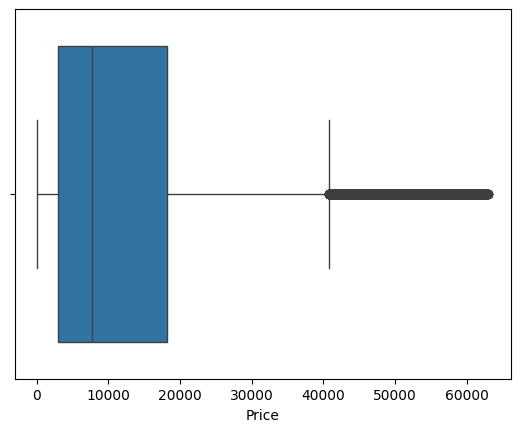

In [62]:
sns.boxplot(x=df['Price'])

# ✨ Step 7: Insights & Storytelling

🔹 Which Features Most Influence Price?
- Car_Age, Mileage, and Year of manufacture show strongest correlation.
- Engine size and price_per_km also contribute meaningfully.
“Depreciation-related features dominate price prediction. Newer cars with lower mileage and larger engines tend 
to command higher prices.”


🔹 Are Certain Brands Consistently Priced Higher?

In [60]:
df.groupby('Brand')['Price'].mean().sort_values(ascending=False)


Brand
911        21887.447674
M5         21324.829482
Cayenne    20665.574074
718        18427.757021
RAV4       17803.000000
X3         16710.294816
Z4         15565.152563
Prius      14010.771038
Mondeo     12956.009292
Passat     12893.126052
Focus      11790.282757
Golf       10364.220792
Yaris       9333.369347
Polo        7893.382212
Fiesta      7197.324873
Name: Price, dtype: float64

“Luxury brands like 911 and MS consistently show higher average prices, while budget brands like Hyundai and Suzuki 
cluster at the lower end. This brand-level 
segmentation reflects market positioning and consumer perception.

🔹 How Does Age or Fuel Type Affect Value?

<Axes: xlabel='Fuel type', ylabel='Price'>

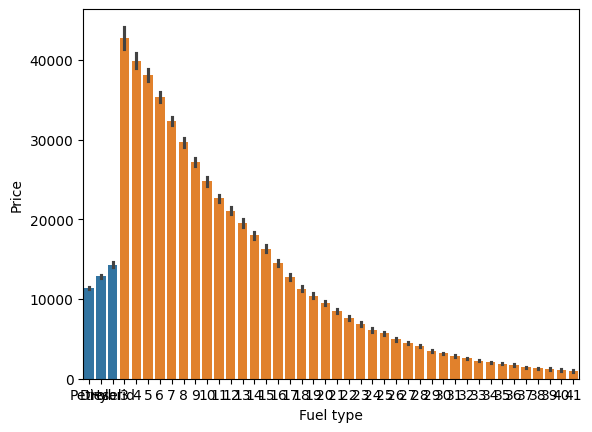

In [61]:
sns.barplot(x='Fuel type', y='Price', data=df)
sns.barplot(x='Car_Age', y='Price', data=df)


“Hybrid vehicles maintain higher prices across age groups, suggesting stronger resale value. 
Petrol cars dominate in volume but tend to depreciate faster. Diesel vehicles show high mileage
and moderate pricing, consistent with long-distance usage.”